In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import pickle

In [2]:
with open('datastore.pkl', 'rb') as file:
  datastore = pickle.load(file)

In [3]:
headlines = []
labels = []

for item in datastore:
  headlines.append(item['headline'])
  labels.append(item['keyword'])

In [4]:
vocab_size = 31714
max_length = 200
trunc_type = "post"
padding = "post"
embedding_dim = 100
training_size = 45000
oov_tok = "<OOV>"

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(headlines)

headlines_sequences = tokenizer.texts_to_sequences(headlines)
padded_headlines = pad_sequences(headlines_sequences, maxlen=max_length, truncating=trunc_type, padding=padding)

In [6]:
labels = to_categorical(labels, num_classes=3)

In [7]:
from sklearn.model_selection import train_test_split

padded_training, padded_testing, training_labels, testing_labels = train_test_split(padded_headlines, labels, test_size=0.20)


In [8]:
training_labels[0]

array([1., 0., 0.], dtype=float32)

In [9]:
word_index = tokenizer.word_index

**Simple Model**

In [10]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.sigmoid)
])
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          3171400   
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2000100   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 5,171,803
Trainable params: 5,171,803
Non-trainable params: 0
_________________________________________________________________


**LSTM Model**

In [12]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.sigmoid)
])
model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 100)          3171400   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 200)          160800    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                59648     
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 3,398,651
Trainable params: 3,398,651
Non-trainable params: 0
____________________________________________

**GRU Model**

In [16]:
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.GRU(100, return_sequences=True),
  tf.keras.layers.GRU(32),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.sigmoid)
])
model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 100)          3171400   
_________________________________________________________________
gru (GRU)                    (None, 200, 100)          60600     
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                12864     
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               3300      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 303       
Total params: 3,248,467
Trainable params: 3,248,467
Non-trainable params: 0
____________________________________________

**Using ConvNets**

In [14]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Conv1D(100, 5, activation=tf.nn.relu),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.sigmoid)
])
model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 100)          3171400   
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 100)          50100     
_________________________________________________________________
flatten_4 (Flatten)          (None, 19600)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               1960100   
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 303       
Total params: 5,181,903
Trainable params: 5,181,903
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 10

In [17]:
# Simple Model
history_1 = model_1.fit(
    padded_training,
    training_labels,
    epochs=num_epochs,
    validation_data=(padded_testing, testing_labels),
    batch_size=128
)

Epoch 1/10
375/375 [==============================] - 16s 32ms/step - loss: 0.2217 - accuracy: 0.8635 - val_loss: 0.1049 - val_accuracy: 0.9448
Epoch 2/10
375/375 [==============================] - 14s 36ms/step - loss: 0.0646 - accuracy: 0.9677 - val_loss: 0.1019 - val_accuracy: 0.9452
Epoch 3/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0304 - accuracy: 0.9866 - val_loss: 0.1129 - val_accuracy: 0.9402
Epoch 4/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.1318 - val_accuracy: 0.9388
Epoch 5/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.1513 - val_accuracy: 0.9350
Epoch 6/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.1672 - val_accuracy: 0.9346
Epoch 7/10
375/375 [==============================] - 12s 33ms/step - loss: 7.2424e-04 - accuracy: 1.0000 - val_loss: 0.1757 - val_accur

In [18]:
# as u see in simple model for large sequences model goes overfitted

In [19]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string.capitalize())
  plt.legend([string, 'val_'+string])
  plt.show()

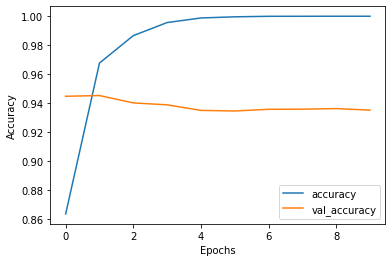

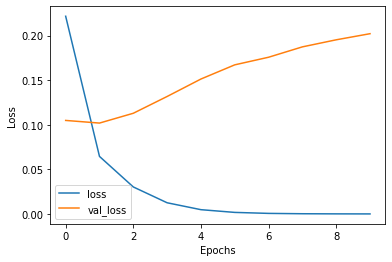

In [20]:
plot_graph(history_1, "accuracy")
plot_graph(history_1, "loss")

In [21]:
# LSTM Model
history_2 = model_2.fit(
    padded_training,
    training_labels,
    epochs=num_epochs,
    validation_data=(padded_testing, testing_labels),
    batch_size=128
)

Epoch 1/10
375/375 [==============================] - 38s 82ms/step - loss: 0.1971 - accuracy: 0.8752 - val_loss: 0.1087 - val_accuracy: 0.9420
Epoch 2/10
375/375 [==============================] - 30s 80ms/step - loss: 0.0648 - accuracy: 0.9668 - val_loss: 0.1229 - val_accuracy: 0.9358
Epoch 3/10
375/375 [==============================] - 29s 78ms/step - loss: 0.0376 - accuracy: 0.9816 - val_loss: 0.1278 - val_accuracy: 0.9336
Epoch 4/10
375/375 [==============================] - 29s 76ms/step - loss: 0.0249 - accuracy: 0.9887 - val_loss: 0.1585 - val_accuracy: 0.9272
Epoch 5/10
375/375 [==============================] - 29s 76ms/step - loss: 0.0191 - accuracy: 0.9915 - val_loss: 0.1696 - val_accuracy: 0.9282
Epoch 6/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0151 - accuracy: 0.9932 - val_loss: 0.1749 - val_accuracy: 0.9275
Epoch 7/10
375/375 [==============================] - 28s 75ms/step - loss: 0.0117 - accuracy: 0.9946 - val_loss: 0.2054 - val_accuracy:

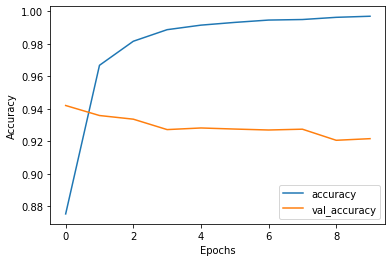

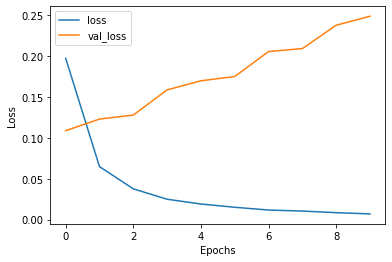

In [22]:
plot_graph(history_2, "accuracy")
plot_graph(history_2, "loss")

In [24]:
# ConvNet Model
history_3 = model_3.fit(
    padded_training,
    training_labels,
    epochs=num_epochs,
    validation_data=(padded_testing, testing_labels),
    batch_size=32
)

Epoch 1/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.1575 - accuracy: 0.9021 - val_loss: 0.1050 - val_accuracy: 0.9438
Epoch 2/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0557 - accuracy: 0.9717 - val_loss: 0.1194 - val_accuracy: 0.9364
Epoch 3/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0231 - accuracy: 0.9881 - val_loss: 0.1563 - val_accuracy: 0.9325
Epoch 4/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0095 - accuracy: 0.9953 - val_loss: 0.2111 - val_accuracy: 0.9307
Epoch 5/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0056 - accuracy: 0.9969 - val_loss: 0.2714 - val_accuracy: 0.9277
Epoch 6/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0032 - accuracy: 0.9983 - val_loss: 0.3062 - val_accuracy: 0.9282
Epoch 7/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0040 - accuracy: 0.9983 - val_loss: 0.3283 -

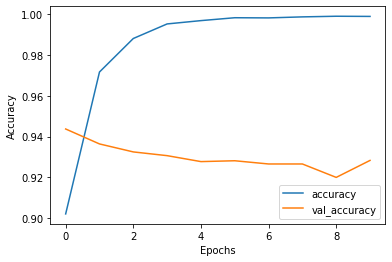

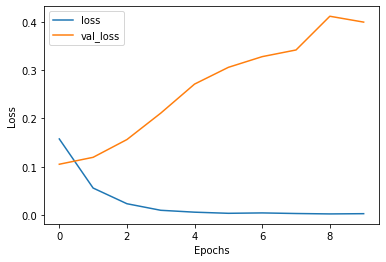

In [25]:
plot_graph(history_3, "accuracy")
plot_graph(history_3, "loss")

In [26]:
# GRU Model
history_4 = model_4.fit(
    padded_training,
    training_labels,
    epochs=num_epochs,
    validation_data=(padded_testing, testing_labels),
    batch_size=32
)

Epoch 1/10
1500/1500 [==============================] - 83s 54ms/step - loss: 0.6373 - accuracy: 0.3298 - val_loss: 0.6368 - val_accuracy: 0.3330
Epoch 2/10
1500/1500 [==============================] - 80s 53ms/step - loss: 0.6369 - accuracy: 0.3298 - val_loss: 0.6366 - val_accuracy: 0.3338
Epoch 3/10
1500/1500 [==============================] - 80s 54ms/step - loss: 0.6367 - accuracy: 0.3299 - val_loss: 0.6365 - val_accuracy: 0.3332
Epoch 4/10
1500/1500 [==============================] - 80s 53ms/step - loss: 0.6368 - accuracy: 0.3326 - val_loss: 0.6368 - val_accuracy: 0.3332
Epoch 5/10
1500/1500 [==============================] - 79s 53ms/step - loss: 0.6368 - accuracy: 0.3347 - val_loss: 0.6368 - val_accuracy: 0.3330
Epoch 6/10
1500/1500 [==============================] - 79s 53ms/step - loss: 0.6367 - accuracy: 0.3339 - val_loss: 0.6369 - val_accuracy: 0.3332
Epoch 7/10
1500/1500 [==============================] - 79s 53ms/step - loss: 0.6367 - accuracy: 0.3329 - val_loss: 0.6366 -

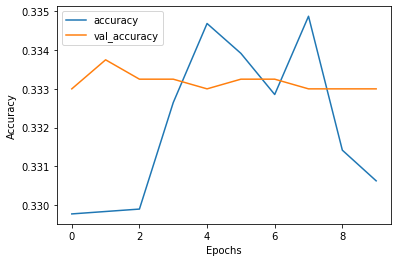

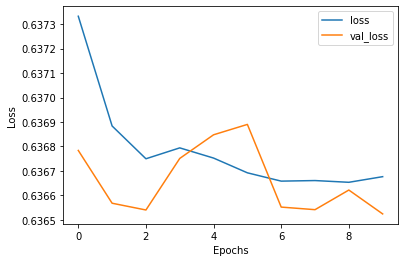

In [27]:
plot_graph(history_4, "accuracy")
plot_graph(history_4, "loss")

In [ ]:
labels = [
    "business",
    "gaming",
    "tech"
]

In [ ]:
sentence = "Google fined €500m by French competition authority"
pred_sequence = tokenizer.texts_to_sequences(sentence)
pred_padded = pad_sequences(pred_sequence, maxlen=max_length, padding=padding, truncating=trunc_type)
prediction = model.predict(pred_padded)
print(prediction)

In [ ]:
sentence = "Stocks making the biggest moves premarket: PepsiCo, JPMorgan, Boeing and others"
pred_sequence = tokenizer.texts_to_sequences(sentence)
pred_padded = pad_sequences(pred_sequence, maxlen=max_length, padding=padding, truncating=trunc_type)
prediction = model.predict(pred_padded)
print(prediction)

In [ ]:
sentence = "Battlegrounds Mobile India: 10 things that can get you permanently banned or make you lose all pervious possessions"
pred_sequence = tokenizer.texts_to_sequences(sentence)
pred_padded = pad_sequences(pred_sequence, maxlen=max_length, padding=padding, truncating=trunc_type)
prediction = model.predict(pred_padded)
print(prediction)